### Data Anaysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json
import datetime as dt

In [2]:
df = pd.read_json(r"C:\Users\Ertuğrul\Downloads\updated_dataset.json", lines=True)
df

,time,remote_ip,remote_user,request,response,bytes,referrer,agent
0,17/May/2015:08:05:32 +0000,93.180.71.3,-,GET /downloads/gislaved-ultra-speed-2-215-55-r...,304,0,-,Debian APT-HTTP/1.3 (0.8.16~exp12ubuntu10.21)
1,17/May/2015:08:05:23 +0000,93.180.71.3,-,GET /downloads/bridgestone-turanza-er300-275-4...,304,0,-,Debian APT-HTTP/1.3 (0.8.16~exp12ubuntu10.21)
2,17/May/2015:08:05:24 +0000,80.91.33.133,-,GET /downloads/kumho-ecsta-ps71-215-45-zr18-93...,304,0,-,Debian APT-HTTP/1.3 (0.8.16~exp12ubuntu10.17)
3,17/May/2015:08:05:34 +0000,217.168.17.5,-,GET /downloads/bridgestone-turanza-er300-rft-2...,200,490,-,Debian APT-HTTP/1.3 (0.8.10.3)
4,17/May/2015:08:05:09 +0000,217.168.17.5,-,GET /downloads/pirelli-scorpion-sealinside-ao-...,200,490,-,Debian APT-HTTP/1.3 (0.8.10.3)
...,...,...,...,...,...,...,...,...
51457,04/Jun/2015:07:06:04 +0000,173.255.199.22,-,GET /downloads/kumho-ecsta-ps71-215-45-zr18-93...,404,339,-,Debian APT-HTTP/1.3 (0.8.10.3)
51458,04/Jun/2015:07:06:05 +0000,54.186.10.255,-,GET /downloads/michelin-alpin-5-zp-n0-225-45-r...,200,2582,-,urlgrabber/3.9.1 yum/3.4.3
51459,04/Jun/2015:07:06:16 +0000,80.91.33.133,-,GET /downloads/pirelli-scorpion-sealinside-ao-...,304,0,-,Debian APT-HTTP/1.3 (0.8.16~exp12ubuntu10.16)
51460,04/Jun/2015:07:06:05 +0000,144.76.151.58,-,GET /downloads/kumho-ecsta-ps71-215-45-zr18-93...,304,0,-,Debian APT-HTTP/1.3 (0.9.7.9)


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51462 entries, 0 to 51461
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   time         51462 non-null  object
 1   remote_ip    51462 non-null  object
 2   remote_user  51462 non-null  object
 3   request      51462 non-null  object
 4   response     51462 non-null  int64 
 5   bytes        51462 non-null  int64 
 6   referrer     51462 non-null  object
 7   agent        51462 non-null  object
dtypes: int64(2), object(6)
memory usage: 3.1+ MB


In [4]:
df['time'] = pd.to_datetime(df['time'], format='%d/%b/%Y:%H:%M:%S %z')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51462 entries, 0 to 51461
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype              
---  ------       --------------  -----              
 0   time         51462 non-null  datetime64[ns, UTC]
 1   remote_ip    51462 non-null  object             
 2   remote_user  51462 non-null  object             
 3   request      51462 non-null  object             
 4   response     51462 non-null  int64              
 5   bytes        51462 non-null  int64              
 6   referrer     51462 non-null  object             
 7   agent        51462 non-null  object             
dtypes: datetime64[ns, UTC](1), int64(2), object(5)
memory usage: 3.1+ MB


In [6]:
df["time"].dt.day

0        17
1        17
2        17
3        17
4        17
         ..
51457     4
51458     4
51459     4
51460     4
51461     4
Name: time, Length: 51462, dtype: int64

In [7]:
df["time"].dt.hour

0        8
1        8
2        8
3        8
4        8
        ..
51457    7
51458    7
51459    7
51460    7
51461    7
Name: time, Length: 51462, dtype: int64

In [8]:
df.iloc[0,0]

Timestamp('2015-05-17 08:05:32+0000', tz='UTC')

In [9]:
df["referrer"].value_counts()

-                                                             51449
http://www.elasticsearch.org/overview/elkdownloads/               6
http://logstash.net/                                              2
http://logstash.net/docs/1.3.3/                                   1
http://www.elasticsearch.org/downloads/1-3-5/                     1
http://www.elasticsearch.org/downloads/1-4-1/                     1
http://www.elasticsearch.org/overview/kibana/installation/        1
http://www.logstash.net/                                          1
Name: referrer, dtype: int64

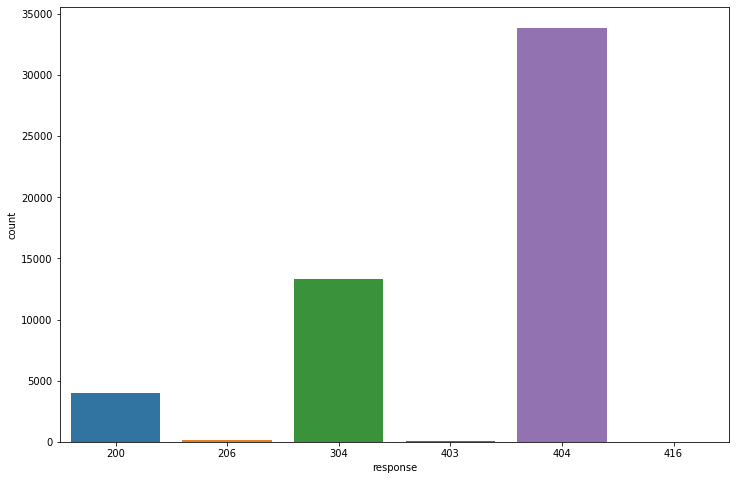

In [10]:
plt.figure(figsize=(12,8))
sns.countplot(x="response",data=df);

In [ ]:
import pandas as pd

# Örnek veri
date_string = "17/May/2015:08:05:32 +0000"

# Tarih ve saat formatını belirtin
datetime_format = "%d/%b/%Y:%H:%M:%S %z"

# datetime formatına dönüştürün
datetime_obj = pd.to_datetime(date_string, format=datetime_format)

print(datetime_obj)

In [ ]:
from dateutil import parser
import datetime
# Tail from actual nginx access.log
from sys import stdin
        
#lines = [
#  '93.180.71.3 - - [17/May/2015:08:05:32 +0000] "GET /downloads/product_1 HTTP/1.1" 502 0 "-" "Debian APT-HTTP/1.3 (0.8.16~exp12ubuntu10.21)',
#  '93.180.71.3 - - [17/May/2015:08:05:23 +0000] "GET /downloads/product_1 HTTP/1.1" 304 0 "-" "Debian APT-HTTP/1.3 (0.8.16~exp12ubuntu10.21)',
#  '80.91.33.133 - - [17/May/2015:08:05:24 +0000] "GET /downloads/product_1 HTTP/1.1" 502 0 "-" "Debian APT-HTTP/1.3 (0.8.16~exp12ubuntu10.17)',
#  '217.168.17.5 - - [17/May/2015:08:05:34 +0000] "GET /downloads/product_1 HTTP/1.1" 200 490 "-" "Debian APT-HTTP/1.3 (0.8.10.3)',
#  '217.168.17.5 - - [17/May/2015:08:40:09 +0000] "GET /downloads/product_2 HTTP/1.1" 500 490 "-" "Debian APT-HTTP/1.3 (0.8.10.3)' 
#]

lines = [
  '93.180.71.3 - - [17/May/2015:08:05:32 +0000] "GET /downloads/gislaved-ultra-speed-2-215-55-r17-98w-xl-2023 HTTP/1.1" 304 0 "-" "Debian APT-HTTP/1.3 (0.8.16~exp12ubuntu10.21)',
  '93.180.71.3 - - [17/May/2015:08:05:23 +0000] "request": "GET /downloads/bridgestone-turanza-er300-275-45-r19-109w-2023 HTTP/1.1" 304 0 "-" "Debian APT-HTTP/1.3 (0.8.16~exp12ubuntu10.21)' 
]

class NginxParser(object):

    MIN = 20
    MAX_NUMBER_OF_ERRORS = 1

    def __init__(self):
        self.status = {}
        self.first_error_time = None
    
    def parse_nginx_log(self, line):

        parts = line.split()
        return_code = parts[8]
        time_stamp = parts[3].replace("[", "")
        date_time = parser.parse(time_stamp, fuzzy=True)

        if return_code.startswith("5"):

          if '500_error' not in self.status:
            self.status['500_error'] = 1
            self.first_error_time = date_time
          else:
            self.status['500_error'] +=1
            if self.status['500_error'] >= self.MAX_NUMBER_OF_ERRORS:
                if date_time - self.first_error_time > datetime.timedelta(minutes=self.MIN):
                  print(self.status)
                  self.status.pop('500_error', None)

    def read_nginx_log(self):
        # can be made to read from sys.stdin
        for line in lines:
           self.parse_nginx_log(line)

if __name__ == '__main__':
    parse = NginxParser()
    parse.read_nginx_log()